<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Alumnos:** Berlín Isabel Preciado Escalera, Mateo Verea Dorantes y Cuauhemoc Corrales Camacho

**Fecha:** 14 de octubre del 2021

**Expediente** : if723259,if709396 y if720482
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/berlinpreciado21/ProyectoSimFin_CCorrales_BIPreciado_MVerea




# Proyecto 
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

### 1.1 Título
### Predicción, compras de clientes en un supermercado 

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  -  Predecir el impacto y comportamiento de futuras compras realizadas en distintos sitios apartir de sus preferencias al realizar una compra.
> #### 1.2 Objetivos específicos.  
>  - Descargar los datos disponibles y limpiar nuestra base de datos.
>  - Analizar la composición de cada una de las variables para determinar que distribuciones se aproximan de mejor manera
>  - Simular nuestras variables de interés en función a la distribución observada para cada una en un período futuro.


### 1.3 Definición del problema.
>El drastico cambió que provocó el virus COVID-19, causó que el comercio electronico aumentara para adquirir productos básicos por la necesidad de quedarse en casa, el distanciamiento social, el confinamiento y otras medidas tomadas en respuesta a la pandemia han llevado a los consumidores a aumentar las compras en línea. Esta tendencia, que comenzó en el confinamiento y que desde entonces ha perdurado, está obligando a supermercados a revisar su plan comercial para adaptarse a los nuevos hábitos, COVID-19 ha hecho que los consumidores alrededor del mundo estén adaptando nuevas tendencias de consumo, menos visitas a puntos de ventas, compras más grandes, visitas a supermercados más cerca del hogar, compras por internet, etc. 
>
>En este proyecto, buscaremos predecir el impacto y la preferencia que pueden tener los compradores al momento de realizar una compra y al sitio al que incurren para realizarla, ya sea mediante una compra en línea, en tienda o catalógo.Para esto nos basaremos en ciertos aspectos importantes, las preferencias del cliente en el sitio y en el producto.

### 1.4  Escenario de negocio a modelar 


 >El escenario a modelar son las distintas compras que la muestra de clientes realizó tras una serie de campañas promocionales. Se simularán escenarios de compras que los clientes en un próximo horizonte de tiempo con el objetivo de afirmar si las campañas aumentaran el número de compras y los ingresos generados hacia la empresa comercial. La finalidad de la simulación es ver el comportamiento que un cliente con denotaciones similares a aquellos en la muestra puede mostrar en un futuro, ver que grupo de productos son más comprados y que medio de compra es el más utilizado.  

### 1.5 Nodos o escenarios a simular

>La base de datos descargada cuenta con 17 variables que se clasifican en 3 grupos: atributos del cliente, atributos de producto y atributos de lugar. Los atributos del cliente se refieren a datos que identifican a cada individuo, dentro de estos datos se tomara la variable “income” como una variable de salida, debido a que representa el objetivo de toda empresa, sus ganancias por ventas. Los atributos de producto se refieren al tipo de producto que la cadena comercial maneja, los agrupa en 5 secciones. Finalmente, los atributos de lugar describen el medio por el cual se realizó la compra, son tres diferentes métodos y todos se considerarán como nodos a analizar para tras las simulaciones descubrir cual medio de venta es el que genera mayores ganancias.  

### 1.6 Definición de hipótesis y supuestos.

>OBJETO DE ESTUDIO:
>- Como las compras en linea aumentan dependiendo de las campañas promocionales que utilizan las empresas y el impacto que la pandemia por Covid-19 afectó.
>
>HIPOTESIS: 
>- Las campañas promocionales y la pandemia por Covid-19 han aumentado exponencialmente las ventas en linea de casi todos los productos.
>
>SUPUESTOS: 
>- La gente ya no quiere salir de su casa para hacer compras.
>- Las campañas de promoción son fundamentales para las ventas en linea
>- La pandemia aumento el uso de plataformas de venta en linea.



### 1.7 Diagrama

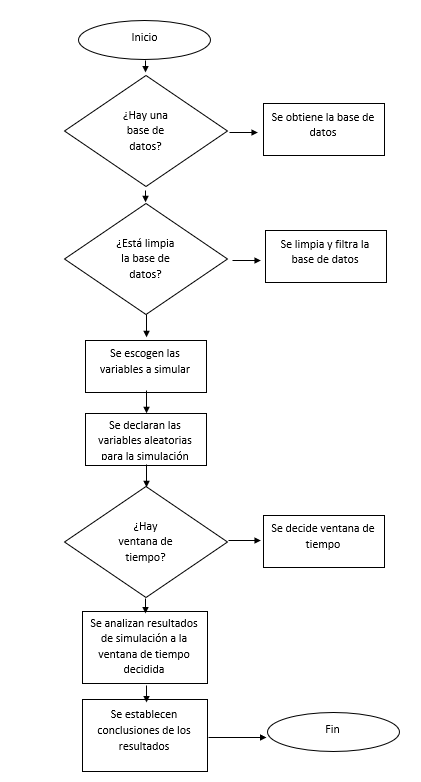